In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

## Warm dark matter (WDM)

pyHalo currently supports a WDM preset model. The default halo mass funciton is detailed by Lovell et al. (2020). https://ui.adsabs.harvard.edu/abs/2020ApJ...897..147L/abstract 

The key parameters for this model are the same as those for cold dark matter (CDM), with the addition of a characteristic mass scale below which both halo abundance and concentration becomes suppressed, relative to CDM. 

1) log_mc: the logarithm (base 10) of the halo mass scale below which halo abundance and structure becomes suppressed

As demonstrated below, the form of the concentration-mass relation and the cutoff in the mass function can be altered by passing additional keyword arguments. 

realization contains 247200 halos.


Text(0, 0.5, 'n(M)')

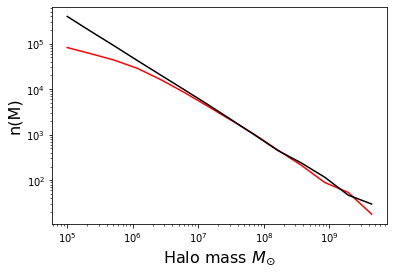

In [2]:
from pyHalo.preset_models import WDM, CDM

zlens, zsource = 0.5, 2.5
# for visualization purposes we will turn off scatter in the concentration-mass relation; default is 0.2 dex
kwargs_concentration_model_subhalos = {'scatter': False}
kwargs_concentration_model_fieldhalos = {'scatter': False}
realizationCDM = CDM(zlens, zsource, cone_opening_angle_arcsec=12, geometry_type='CYLINDER', sigma_sub=0.1, log_mlow=5.0)
realizationWDM = WDM(zlens, zsource, log_mc=6., cone_opening_angle_arcsec=12, log_mlow=5.0,
                     geometry_type='CYLINDER', sigma_sub=0.1,
                    kwargs_concentration_model_subhalos=kwargs_concentration_model_subhalos,
                    kwargs_concentration_model_field=kwargs_concentration_model_fieldhalos)
print('realization contains '+str(len(realizationWDM.halos))+' halos.')
wdm_halo_masses = [halo.mass for halo in realizationWDM.halos]
N, m = np.histogram(wdm_halo_masses, bins=np.logspace(5, 10, 15))
wdm_halo_masses = [halo.mass for halo in realizationCDM.halos]
Ncdm, mcdm = np.histogram(wdm_halo_masses, bins=np.logspace(5, 10, 15))

plt.loglog(m[0:-1], N, color='r')
plt.loglog(mcdm[0:-1], Ncdm, color='k')
plt.xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
plt.ylabel('n(M)', fontsize=16)

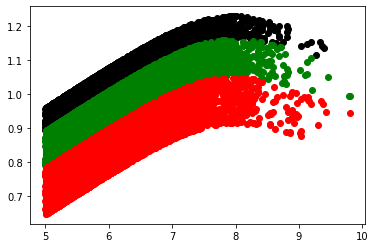

In [3]:
masses_1 = []
c_1 = []
masses_2 = []
c_2 = []
masses_3 = []
c_3 = []
z_bins = [0.3, 0.8, 1.5]
for halo in realizationWDM.halos:
    if halo.is_subhalo: # subhalos have a lot of scatter because their concentration is evaluated at infall
        continue
    if halo.z < z_bins[0]:
        masses_1.append(halo.mass)
        c_1.append(halo.c)
    elif halo.z < z_bins[1]:
        masses_2.append(halo.mass)
        c_2.append(halo.c)
    elif halo.z < z_bins[2]:
        masses_3.append(halo.mass)
        c_3.append(halo.c)
plt.scatter(np.log10(masses_1), np.log10(c_1), color='k')
plt.scatter(np.log10(masses_2), np.log10(c_2), color='g')
plt.scatter(np.log10(masses_3), np.log10(c_3), color='r')

### Modfied turnovers in the concentration-mass relation and mass function

You can change the implementation of the turnover by specifying certain keyword arguments. These will override the default settings. 

The default mass function setting has a turnover of the form 

\begin{equation}
\frac{dN_{\rm{WDM}}}{dm} = \frac{dN_{\rm{CDM}}}{dm} \left(1 + a_{\rm{wdm}} \left(\frac{m_c}{m}\right)^{b_{\rm{wdm}}}\right)^{c_{\rm{wdm}}}
\end{equation}

The defalt concentration-mass relation turnover is of the form given by Bose et al. (2016)

\begin{equation}
c_{\rm{WDM}}\left(m\right) = c_{\rm{CDM}}\left(m\right) \left(1+z\right)^{\beta\left(z\right)} \left(1+c_{\rm{scale}}\left(\frac{m_c}{m}\right)^{c_{\rm{powerinner}}}\right)^{c_{\rm{power}}}
\end{equation}

Other options are available. Check out the classes in pyHalo.rendering.MassFunctions

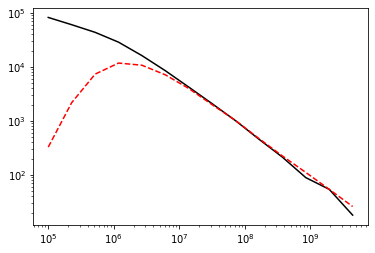

In [4]:
kwargs_concentration_model_subhalos = {'scatter': False, 'c_scale': 0.5, 'c_power_inner': 1.0, 'c_power': -1.0}
kwargs_concentration_model_fieldhalos = {'scatter': False, 'c_scale': 0.5, 'c_power_inner': 1.0, 'c_power': -1.0}

kwargs_mass_function_model_subhalos = {'a_wdm': 0.5, 'b_wdm': 1.0, 'c_wdm': -5.0}
kwargs_mass_function_model_fieldhalos = {'a_wdm': 0.5, 'b_wdm': 1.0, 'c_wdm': -5.0}

realizationWDM_modified = WDM(zlens, zsource, log_mc=6., cone_opening_angle_arcsec=12, log_mlow=5.0,
                     geometry_type='CYLINDER', sigma_sub=0.1,
                    kwargs_concentration_model_subhalos=kwargs_concentration_model_subhalos,
                    kwargs_concentration_model_field=kwargs_concentration_model_fieldhalos,
                             kwargs_mass_function_subhalos=kwargs_mass_function_model_subhalos,
                             kwargs_mass_function_fieldhalos=kwargs_mass_function_model_fieldhalos)

wdm_halo_masses = [halo.mass for halo in realizationWDM_modified.halos]
N_mod, m_mod = np.histogram(wdm_halo_masses, bins=np.logspace(5, 10, 15))

plt.loglog(m[0:-1], N, color='k')
plt.loglog(m_mod[0:-1], N_mod, color='r',linestyle='--')

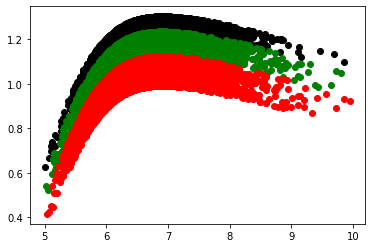

In [5]:
masses_1 = []
c_1 = []
masses_2 = []
c_2 = []
masses_3 = []
c_3 = []
z_bins = [0.3, 0.8, 1.5]
for halo in realizationWDM_modified.halos:
    if halo.is_subhalo: # subhalos have a lot of scatter because their concentration is evaluated at infall
        continue
    if halo.z < z_bins[0]:
        masses_1.append(halo.mass)
        c_1.append(halo.c)
    elif halo.z < z_bins[1]:
        masses_2.append(halo.mass)
        c_2.append(halo.c)
    elif halo.z < z_bins[2]:
        masses_3.append(halo.mass)
        c_3.append(halo.c)
plt.scatter(np.log10(masses_1), np.log10(c_1), color='k')
plt.scatter(np.log10(masses_2), np.log10(c_2), color='g')
plt.scatter(np.log10(masses_3), np.log10(c_3), color='r')

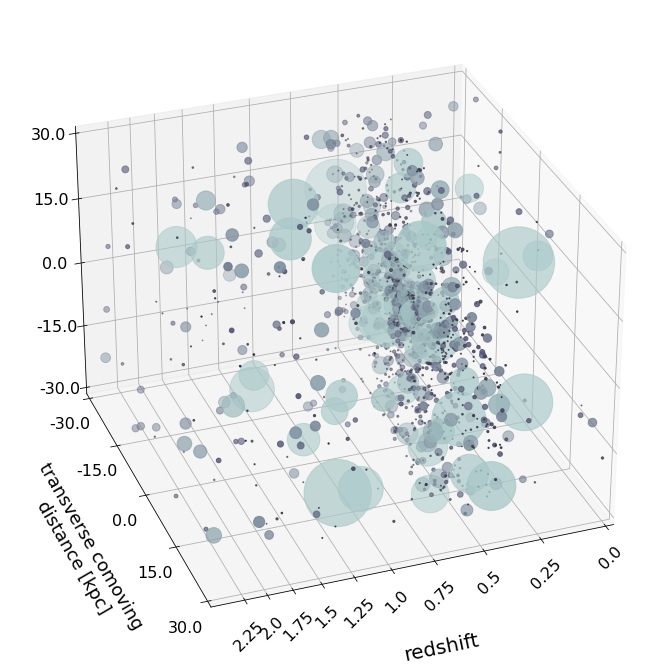

In [6]:
wdm_plot = WDM(zlens, zsource, log_mc=8.5, cone_opening_angle_arcsec=8, 
                     geometry_type='CYLINDER', sigma_sub=0.05)

fig = plt.figure(1)
fig.set_size_inches(16, 12)
ax = plt.subplot(111, projection='3d')
wdm_plot.plot(ax)